Top 3 Most Profitable Products:
 PROD_NAME
Dorito Corn Chp     Supreme 380g            40352.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Name: TOT_SALES, dtype: float64

Top 3 Most Loyal Customer Segments:
 LIFESTAGE              PREMIUM_CUSTOMER
OLDER FAMILIES         Budget              168363.25
YOUNG SINGLES/COUPLES  Mainstream          157621.60
RETIREES               Mainstream          155677.05
Name: TOT_SALES, dtype: float64

Purchase Frequency by Customer Segment:
                 LIFESTAGE PREMIUM_CUSTOMER  PURCHASE_COUNT  \
6          OLDER FAMILIES           Budget           23160   
13               RETIREES       Mainstream           21466   
19  YOUNG SINGLES/COUPLES       Mainstream           20854   
15         YOUNG FAMILIES           Budget           19122   
9   OLDER SINGLES/COUPLES           Budget           18407   

                               SEGMENT  
6              OLDER FAMILIES - Budget  
13 

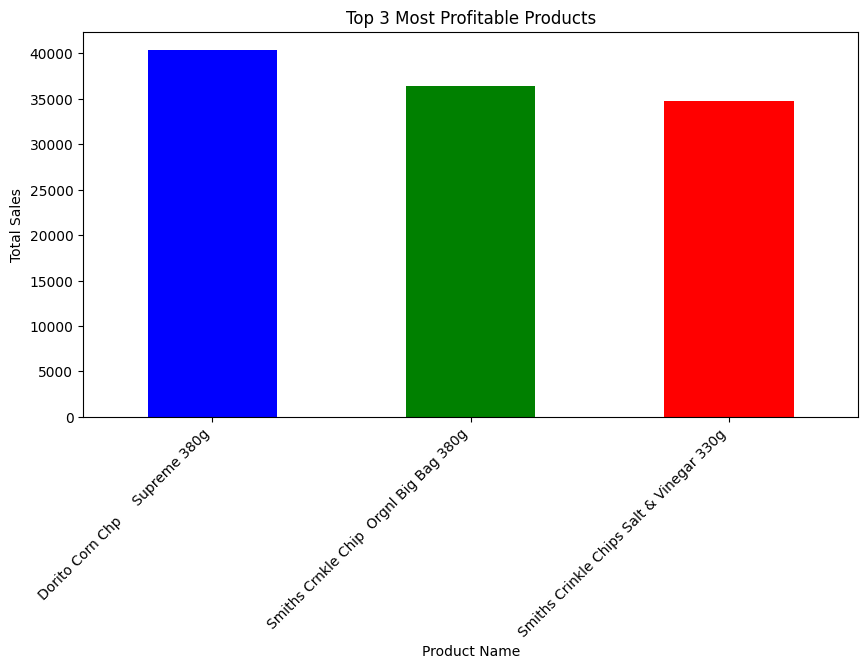

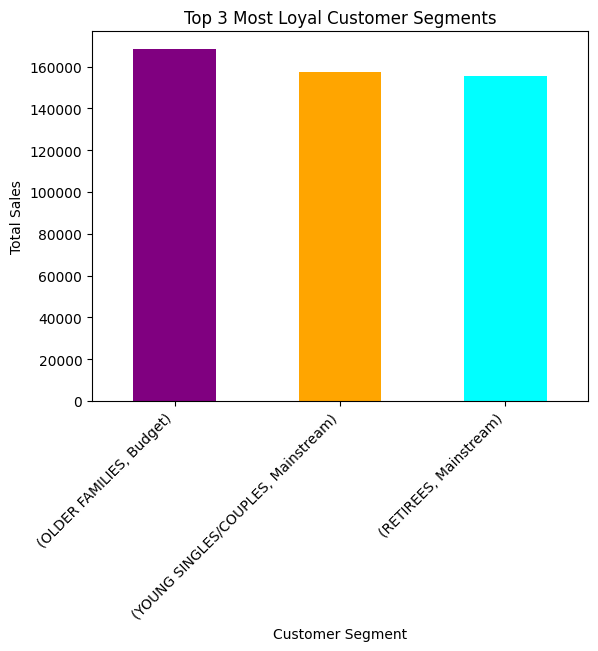

<Figure size 1000x500 with 0 Axes>

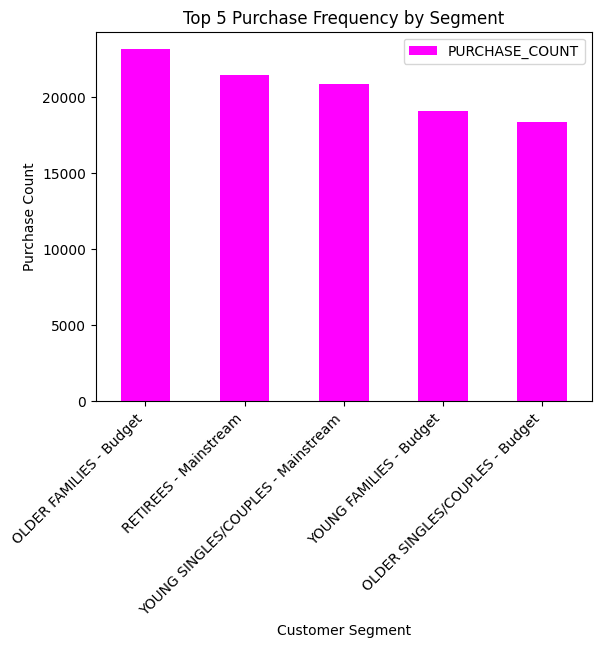

<Figure size 1000x500 with 0 Axes>

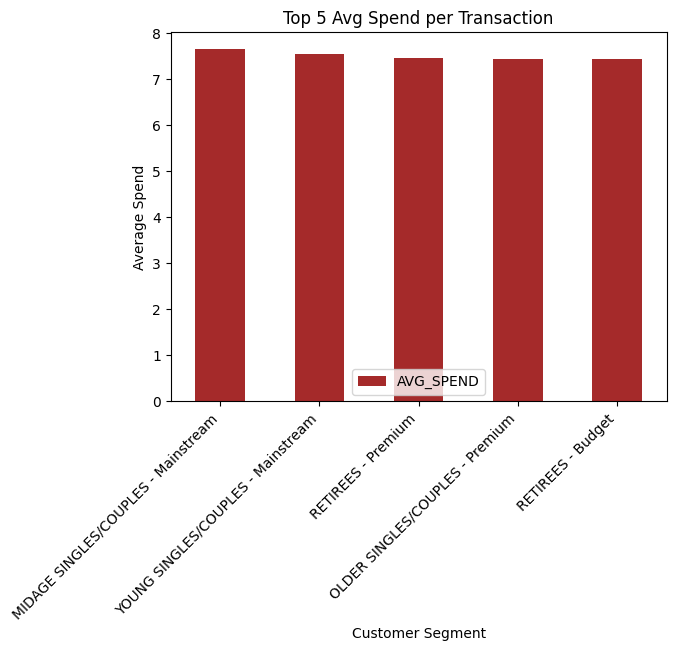

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

customer_data_path = "/Users/bipashaamohanty/Documents/projects/cust-proft-analysis/purchase_behaviour.csv"
transaction_data_path = "/Users/bipashaamohanty/Documents/projects/cust-proft-analysis/transaction_data.csv"

df_customers = pd.read_csv(customer_data_path)
df_transactions = pd.read_csv(transaction_data_path)

df_transactions['DATE'] = pd.to_datetime(df_transactions['DATE'], origin='1899-12-30', unit='D')
top_products = df_transactions.groupby("PROD_NAME")["TOT_SALES"].sum().nlargest(3)
print("Top 3 Most Profitable Products:\n", top_products)

df_merged = df_transactions.merge(df_customers, on="LYLTY_CARD_NBR")

loyal_customers = df_merged.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum().nlargest(3)
print("\nTop 3 Most Loyal Customer Segments:\n", loyal_customers)

purchase_frequency = df_merged.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).size().reset_index(name='PURCHASE_COUNT')
purchase_frequency["SEGMENT"] = purchase_frequency["LIFESTAGE"] + " - " + purchase_frequency["PREMIUM_CUSTOMER"]
print("\nPurchase Frequency by Customer Segment:\n", purchase_frequency.sort_values(by='PURCHASE_COUNT', ascending=False).head(5))

avg_spend = df_merged.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].mean().reset_index(name='AVG_SPEND')
avg_spend["SEGMENT"] = avg_spend["LIFESTAGE"] + " - " + avg_spend["PREMIUM_CUSTOMER"]
print("\nAverage Spend per Transaction by Customer Segment:\n", avg_spend.sort_values(by='AVG_SPEND', ascending=False).head(5))

for (lifestage, premium), group in df_merged.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]):
    top_products_per_segment = group.groupby("PROD_NAME")["TOT_SALES"].sum().nlargest(3)
    print(f"\nTop Products for {lifestage} - {premium}:\n", top_products_per_segment)

plt.figure(figsize=(10, 5))

# Visualization: Top 3 Most Profitable Products
top_products.plot(kind='bar', title='Top 3 Most Profitable Products', color=['blue', 'green', 'red'])
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualization: Top 3 Most Loyal Customer Segments
loyal_customers.plot(kind='bar', title='Top 3 Most Loyal Customer Segments', color=['purple', 'orange', 'cyan'])
plt.xlabel("Customer Segment")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualization: Purchase Frequency by Customer Segment
plt.figure(figsize=(10, 5))
purchase_frequency.sort_values(by='PURCHASE_COUNT', ascending=False).head(5).plot(
    kind='bar', x='SEGMENT', y='PURCHASE_COUNT', title='Top 5 Purchase Frequency by Segment', color='magenta')
plt.xlabel("Customer Segment")
plt.ylabel("Purchase Count")
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualization: Average Spend per Transaction
plt.figure(figsize=(10, 5))
avg_spend.sort_values(by='AVG_SPEND', ascending=False).head(5).plot(
    kind='bar', x='SEGMENT', y='AVG_SPEND', title='Top 5 Avg Spend per Transaction', color='brown')
plt.xlabel("Customer Segment")
plt.ylabel("Average Spend")
plt.xticks(rotation=45, ha='right')
plt.show()
